In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import random

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


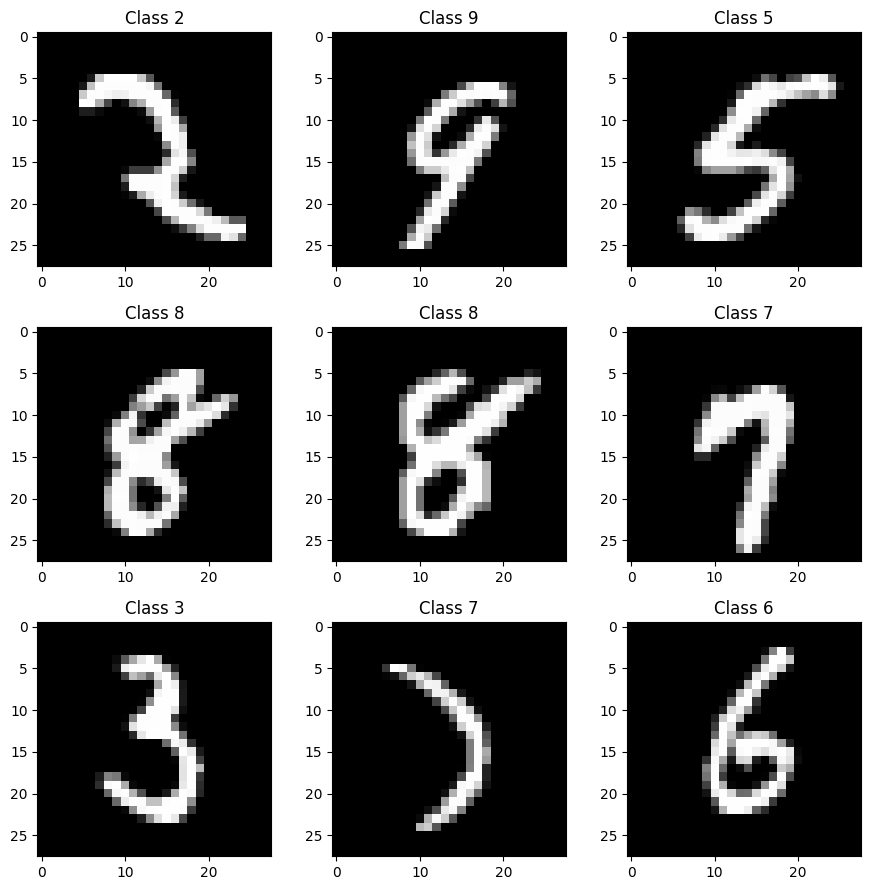

In [4]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.2),  

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model.fit(x_train, y_train, epochs=10, batch_size=64)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')



D:\маг1курс\ІАД\Lab1\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7138 - loss: 0.8441
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9558 - loss: 0.1534
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9669 - loss: 0.1141
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9736 - loss: 0.0945
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9758 - loss: 0.0822
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9784 - loss: 0.0710
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9813 - loss: 0.0646
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9823 - loss: 0.0596
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9832 - loss: 0.0584
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9840 - loss: 0.0527
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9873 - loss: 0.0485
Test accuracy: 0.9896000027656555


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


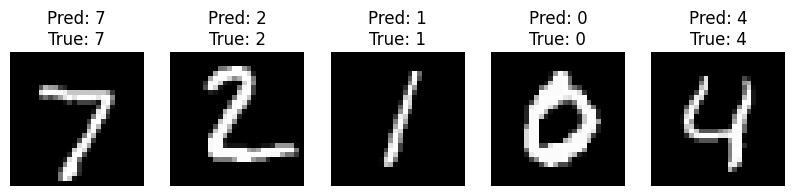

In [6]:
predictions = model.predict(x_test)

num_examples = 5

plt.figure(figsize=(10, 5))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  
    plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}')  
    plt.axis('off') 

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


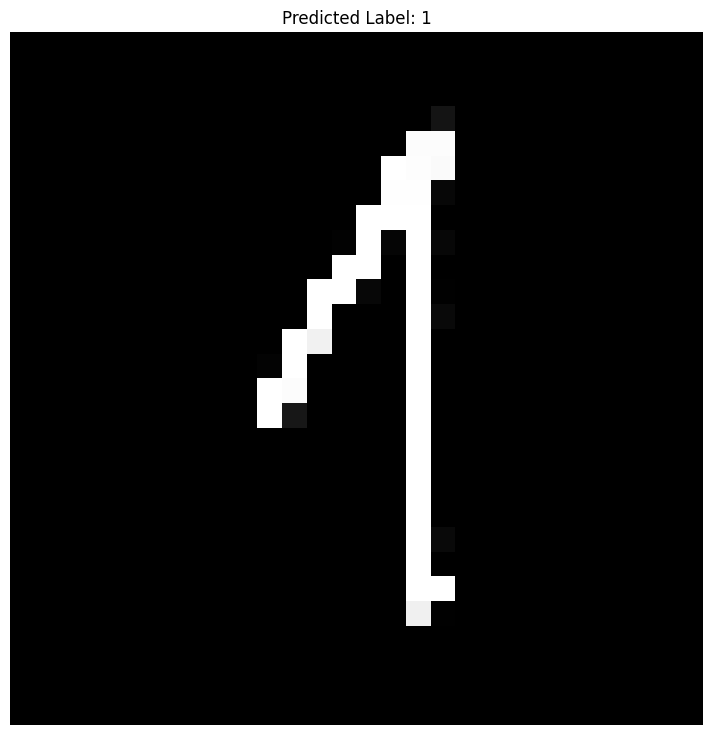

In [7]:
def predict_digit(image_path):
    img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)  # Преобразуем изображение в массив
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем batch dimension
    img_array = img_array / 255.0  # Нормализуем изображение

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)  

    plt.imshow(img, cmap='gray')  # Отображаем изображение в оттенках серого
    plt.title(f'Predicted Label: {predicted_label}')  # Заголовок с предсказанной цифрой
    plt.axis('off')  # Отключаем оси для красоты
    plt.show()

    return predicted_label

image_path = '1.jpg'  
predicted_label = predict_digit(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


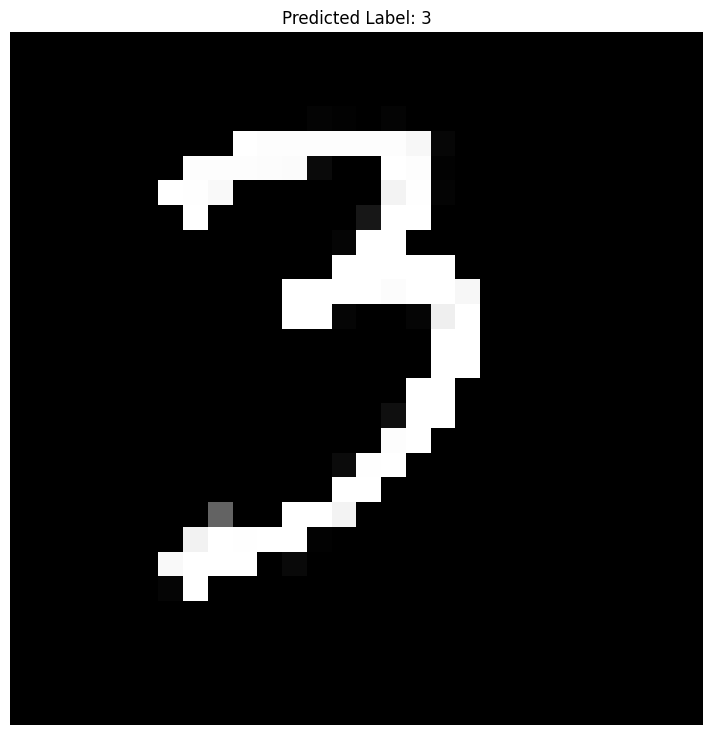

In [8]:
image_path = '3.jpg' 
predicted_label = predict_digit(image_path)

In [65]:
model.save('my_model.h5')